## Introduction


Many of the students at Pitt are smart enough to not bring their car to campus. This is most likely because of the city environment, making nearly every destination available by walking or public transportation. But if you did bring your car, what neighborhoods should you avoid?

## Our Metric

We decided to find the worst neighborhood to drive through in Pittsburgh. We used the following metrics to find the worst:

- Yearly Crashes per Neighborhood
- Daily Traffic Counts per Neighborhood
- Speed Humps in Each Neighborhood

We used the following datasets to calculate these metrics


- [Number of Crashes (2021)](https://data.wprdc.org/dataset/allegheny-county-crash-data)

Contains data of every crash in Allegheny county from 2021 (Decided to only do 2021 instead of 2004-2021 because it took an unbearable amount of time to use). By pairing with Neighborhoods dataset(see below) we will match each crash to its respective neighborhood. More crashes means a neighborhood is worse to drive in.

- [Number of Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

Contains counts of speed humps in each neighborhood in Pittsburgh, the more speed humps, the worse the neighborhood is.  

- [Traffic Count](https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167)

- [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

Details the boundaries of each neighborhood so we are able to place the crashes within their respective neighborhoods. 

# Speed Bumps by Neighborhood
#### By: Jake Kressley
Dataset: [City of Pittsburgh Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

## Setting Up the Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

To start let's load in the speed bumps data.

In [2]:
speed_humps_df = pd.read_csv("data/speed-humps.csv")
speed_humps_df.head(5)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


Next let's filter out the unnessessary columns to make the data look a little more readable. 

In [3]:
# Create a new dataframe
speedhumps = pd.DataFrame(columns = ["Neighborhood", "Hump_ID"])

# Add the desired data to the dataframe
speedhumps["Neighborhood"] = speed_humps_df["neighborhood"]
speedhumps["Hump_ID"] = speed_humps_df["hump_id"]

speedhumps.head(5)

,Neighborhood,Hump_ID
0,Squirrel Hill South,1
1,Squirrel Hill South,2
2,North Oakland,3
3,North Oakland,4
4,North Oakland,5


Since this csv tracks by individual speed hump and not how many there are in a neighborhood, we will have to create a hash map to track how many speed bumps are in each neighborhood.

In [4]:
# define the dictionary that will store the data
speedhump_dict = {}

for i, row in speedhumps.iterrows():
    neighborhood = row["Neighborhood"]
    
    if neighborhood not in speedhump_dict.keys():
        speedhump_dict.update({neighborhood: 1})
    else:
        speedhump_dict[neighborhood] += 1

speedhumps_df = pd.DataFrame.from_dict(speedhump_dict, orient = "index")
speedhumps_df.columns = ["Speed Humps"]

speedhumps_df.head()

,Speed Humps
Squirrel Hill South,18
North Oakland,6
Brookline,4
Bloomfield,3
Polish Hill,6


(If a neighborhood does not have any values it is safe to assume that there are no speedbumps in that neighborhood.)

Now we can sort the data in descending order to find which neighborhoods have the highest amount of speed humps.

In [5]:
speedhumps_df = speedhumps_df.sort_values("Speed Humps", ascending=False)
speedhumps_df

,Speed Humps
Squirrel Hill South,18
Carrick,9
Polish Hill,6
North Oakland,6
Upper Hill,4
Brookline,4
Homewood South,4
South Side Slopes,4
Perry North,4
Garfield,3


We can now create a graph that represents how many speed humps are in each neighborhood

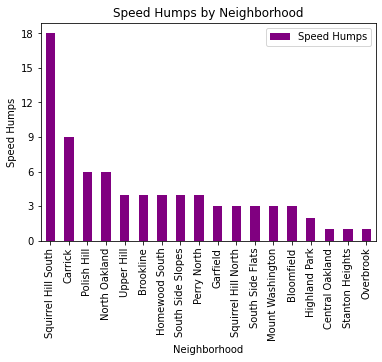

In [6]:
speedhumps_plt = speedhumps_df.plot(kind='bar', 
                                    title="Speed Humps by Neighborhood", 
                                    color='purple', 
                                    )

speedhumps_plt.set_xlabel("Neighborhood")
speedhumps_plt.set_ylabel("Speed Humps")
speedhumps_plt.set_yticks(range(0, speedhumps_df["Speed Humps"].max() + 1, 3))
plt.show()

From this data you can see that Squirrel Hill South has the most speed bumps.

Eventually we will gather the results of all of our datasets so it would be smart to create a new dataframe now and save the metrics throughout the project.

In [39]:
final_rankings = pd.DataFrame(columns = ["Neighborhood", "Humps Rank", "Traffic Rank", "Crashes Rank"])
final_rankings["Neighborhood"] = speedhumps_df.index
final_rankings["Humps Rank"] = 0
final_rankings["Traffic Rank"] = 0
final_rankings["Crashes Rank"] = 0

rank = 1
for neighborhood in speedhumps_df.index:
    final_rankings.loc[final_rankings["Neighborhood"] == neighborhood, "Humps Rank"] = rank
    rank += 1
    

final_rankings.sort_values("Humps Rank")

,Neighborhood,Humps Rank,Traffic Rank,Crashes Rank
0,Squirrel Hill South,1,0,0
1,Carrick,2,0,0
2,Polish Hill,3,0,0
3,North Oakland,4,0,0
4,Upper Hill,5,0,0
5,Brookline,6,0,0
6,Homewood South,7,0,0
7,South Side Slopes,8,0,0
8,Perry North,9,0,0
9,Garfield,10,0,0


For our collective final rankings we must make sure every neighborhood has at least some value. Therefore, we will assign every neighborhood that does not have a humps rank of 19. This will not affect the final rankings much as you will see later.

In [103]:
neighborhood_data = gpd.read_file('data/pittsburghpaneighborhoods-/Neighborhoods_.shp')

neighborhood_names = pd.DataFrame(columns = ["Neighborhood"])
neighborhood_names["Neighborhood"] = neighborhood_data["hood"]

neighborhood_names.head()

,Neighborhood
0,Point Breeze North
1,Squirrel Hill North
2,Garfield
3,Bedford Dwellings
4,Knoxville


In [111]:
for index, row in final_rankings.iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood not in neighborhood_names['Neighborhood'].values:
        new_row = pd.DataFrame({"Neighborhood": [neighborhood], "Humps Rank": [19], "Traffic Rank": [0], "Crashes Rank": [0]})
        final_rankings = pd.concat([final_rankings, new_row], ignore_index=True)
        
final_rankings.sort_values("Humps Rank")

,Neighborhood,Humps Rank,Traffic Rank,Crashes Rank
12,Squirrel Hill South,1,259,0
10,Carrick,2,254,0
2,Polish Hill,3,232,0
3,North Oakland,4,102,0
17,Upper Hill,5,240,0
...,...,...,...,...
36,Greenfield,50,0,0
37,Homewood North,50,0,0
38,Friendship,50,0,0
40,Sheraden,50,0,0


# Traffic Count and Safety of Neighborhoods in Pittsburgh

By: Vishal Suthakar

## First we have to import pandas. Then we import the data in from the csv file.

In [8]:
import pandas as pd
df=pd.read_csv("TrafficCount.csv")
print(df)

             id  device_id    record_oid count_start_date count_end_date  \
0    1011743669         85  1.445865e+09       2019-04-18     2019-04-26   
1    1026101993        140  1.121444e+09       2019-01-24            NaN   
2    1032382575         11  1.539893e+09       2018-08-28     2018-09-04   
3     103627606          9  7.341951e+08       2018-07-17     2018-08-01   
4    1039546167        144           NaN              NaN            NaN   
..          ...        ...           ...              ...            ...   
415  1132416719        434           NaN              NaN            NaN   
416  1037219067        435           NaN              NaN            NaN   
417  1329604877        436  1.001259e+09       2021-07-21            NaN   
418   704127706        437  1.832664e+09       2021-07-21            NaN   
419  1814538648        438  1.741899e+09       2021-07-21            NaN   

     average_daily_car_traffic  average_daily_bike_traffic counter_number  \
0         



## This is too much data to look through to find what we need. We are trying to calculate the amount of traffic, and the safety on the road, by neighborhoods.



### First: Amount of Traffic

Let's only use the average_daily_car_traffic and the neighborhood columns so we can see what neighborhood has the most traffic. 

In [59]:
df=pd.read_csv("TrafficCount.csv",usecols=['average_daily_car_traffic','neighborhood'])
sorted_df=df.sort_values(by='average_daily_car_traffic', ascending=False)
sorted_df.head(10)

,average_daily_car_traffic,neighborhood
39,16729.0,Regent Square
111,16711.0,Strip District
199,15000.0,Bloomfield
93,13788.0,East Hills
37,12335.0,Point Breeze
14,11500.0,Crafton Heights
18,10350.0,North Shore
302,10113.0,Shadyside
286,10001.0,Squirrel Hill North
21,9709.0,Brookline


We should now remove all NaN values from that dataset

In [61]:
sorted_df = sorted_df.dropna()

sorted_df.head()

,average_daily_car_traffic,neighborhood
39,16729.0,Regent Square
111,16711.0,Strip District
199,15000.0,Bloomfield
93,13788.0,East Hills
37,12335.0,Point Breeze


After sorting the values, we can see the top 10 neighborhoods with the most traffic are Regent Square, Strip District, Bloomfield, East Hills, Point Breeze, Crafton Heights, North Shore, Shadyside, Squirrel Hill North, and Brookline.

We can now rank these neighborhoods based on their average_daily_car_traffic

In [65]:
sorted_df['Rank'] = sorted_df['average_daily_car_traffic'].rank(method='dense', ascending=False).astype(int)

sorted_df.head()

,average_daily_car_traffic,neighborhood,Rank
39,16729.0,Regent Square,1
111,16711.0,Strip District,2
199,15000.0,Bloomfield,3
93,13788.0,East Hills,4
37,12335.0,Point Breeze,5


Now we will add these rankings to the final rankings in the Traffic Rank column

In [77]:
for index, row in final_rankings.iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood not in sorted_df['neighborhood'].values:
        new_row = pd.DataFrame({"Neighborhood": [neighborhood], "Humps Rank": [50], "Traffic Rank": [0], "Crashes Rank": [0]})
        final_rankings = pd.concat([final_rankings, new_row], ignore_index=True)

final_rankings.sort_values("Traffic Rank").head()

,Neighborhood,Humps Rank,Traffic Rank,Crashes Rank
0,Garfield,10,0,0
35,Duquesne Heights,50,0,0
36,Greenfield,50,0,0
37,Homewood North,50,0,0
38,Friendship,50,0,0


Since this does not display the neighborhoods without a speed hump count, we must write some code to correct that

In [72]:
final_rankings = pd.concat([final_rankings, pd.DataFrame(columns=["Neighborhood", "Humps Rank", "Traffic Rank", "Crashes Rank"])])

for neighborhood in sorted_df['neighborhood'].unique():
    if neighborhood not in final_rankings['Neighborhood'].values:
        new_row = pd.DataFrame({"Neighborhood": [neighborhood], "Humps Rank": [50], "Traffic Rank": [0], "Crashes Rank": [0]})
        final_rankings = pd.concat([final_rankings, new_row])
final_rankings.sort_values("Traffic Rank").head()

,Neighborhood,Humps Rank,Traffic Rank,Crashes Rank
0,Garfield,10,0,0
34,California-Kirkbride,50,0,0
35,Duquesne Heights,50,0,0
36,Greenfield,50,0,0
37,Homewood North,50,0,0


### Next: Safety on the Road
#### In this scenario, the most significant value is the percent of drivers who were driving over the speed limit. Again, we need the inplace to be true, and the neighborhood column to actually use the data.

In [11]:
import pandas as pd
import numpy as np
df=pd.read_csv("TrafficCount.csv",usecols=['percent_over_limit','neighborhood'])
df2=df.sort_values(by='percent_over_limit',inplace=True,ascending=False)
df.head(10)

,percent_over_limit,neighborhood
93,98.0,East Hills
70,98.0,Manchester
14,98.0,Crafton Heights
370,97.0,Squirrel Hill South
311,97.0,Manchester
240,97.0,Squirrel Hill South
129,97.0,Perry North
142,97.0,Elliott
162,97.0,Point Breeze
41,97.0,East Liberty


After sorting the values, the top 10 highest percentage of over the speed limit drivers were East Hills, Manchester, Crafton Heights, Perry North, Point Breeze, and East Liberty.

We have decided not to include this data in our final outcome.


# Number of Crashes by Neighborhood
### By: Jake Kressley

Datasets: 

[Allegheny County Crash Data (2021)](https://data.wprdc.org/dataset/allegheny-county-crash-data)

[Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

(load in the data and then say as you can see there is no neighborhood column)

Let's start the same way as last time by importing and setting up the notebook

In [86]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Now we can load in our crash data

In [13]:
crash_data = pd.read_csv('data/crash-data.csv', low_memory=False)

crash_data.head(3)

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2021000002,11,2,2113,02113,2021,1,6,28.0,0.0,...,2.0,N,2,0130,35.0,142.0,490.0,BEULAH RD,4,NaN
1,2021000007,11,2,2113,02113,2021,1,6,100.0,1.0,...,99.0,U,4,NaN,NaN,NaN,NaN,LAKETON RD,0,NaN
2,2021000017,11,2,2301,02301,2021,1,6,140.0,1.0,...,2.0,N,4,NaN,25.0,NaN,NaN,SARANAC AV,0,NaN


Evidently, this data set does not include the specific neighborhood which an incident occured in. However, it does have the latitude and longitudinal coordinates, so we can manually find the neighborhood each crash occured in.

Still, we can make this table a little more readable.

In [14]:
crashes = pd.DataFrame(columns = ["Crash ID", "Latitude", "Longitude"])
crashes["Crash ID"] = crash_data["CRASH_CRN"]
crashes["Latitude"] = crash_data["DEC_LAT"]
crashes["Longitude"] = crash_data["DEC_LONG"]

crashes.head(3)

,Crash ID,Latitude,Longitude
0,2021000002,40.4525,-79.8444
1,2021000007,40.4602,-79.8426
2,2021000017,40.3992,-80.0250


Almost there we just need to remove NaN values

In [15]:
# removes a row if either latitude or longitude have a null value
filtered_crashes = crashes[crashes[['Latitude', 'Longitude']].notnull().all(1)]

# Decided to do only the 
filtered_crashes = filtered_crashes.iloc[:10000]

filtered_crashes

,Crash ID,Latitude,Longitude
0,2021000002,40.4525,-79.8444
1,2021000007,40.4602,-79.8426
2,2021000017,40.3992,-80.0250
3,2021000020,40.4626,-79.8040
4,2021000026,40.3497,-79.8561
...,...,...,...
10000,2021111471,40.4778,-79.7359
10001,2021111472,40.4390,-80.0157
10002,2021111489,40.4147,-79.8487
10003,2021111493,40.4054,-79.9114


Now we need to figure out which neighborhood each crash occured in. To do this we will first have to load in our neighborhood data.

In [97]:
neighborhood_data = gpd.read_file('data/pittsburghpaneighborhoods-/Neighborhoods_.shp')

neighborhood_data.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


We will have to use the Geometry column to determine which crashes occur in which neighborhood. So let's make a new dataframe with only the desired columns

In [17]:
filtered_neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Crashes"])
filtered_neighborhoods["Neighborhood"] = neighborhood_data["hood"]
filtered_neighborhoods["Geometry"] = neighborhood_data["geometry"]

# Set the crash count to 0 so we can count them later.
filtered_neighborhoods["Crashes"] = 0

filtered_neighborhoods.head(3)

,Neighborhood,Geometry,Crashes
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0


Now check each crash and calculate which neighborhood they occured in. We will do this by using the Point class. The point class has a contains() function that allows you to check if a certain point is contained in a group of points. 

In [18]:
from shapely.geometry import Point
crash_dict = {}

for i, crash in filtered_crashes.iterrows():
    # First, fix the point by using the correct latitude and longitude
    pt = Point(crash["Longitude"], crash["Latitude"])
    for j, neighborhood in filtered_neighborhoods.iterrows():
        # Check if the neighborhood has the stop
        if neighborhood["Geometry"].contains(pt):
            filtered_neighborhoods.at[j, 'Crashes'] = neighborhood["Crashes"] + 1
            # Break to save computation time
            break

filtered_neighborhoods.head()

,Neighborhood,Geometry,Crashes
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",37
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",64
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",19
3,Bedford Dwellings,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",15
4,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",31


Now we can sort the neighborhoods by which ones have the most crashes.

In [19]:
neighborhoods_sorted = filtered_neighborhoods.sort_values("Crashes", ascending=False)

neighborhoods_sorted.head(20)

,Neighborhood,Geometry,Crashes
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",184
43,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",183
88,South Side Flats,"POLYGON ((-79.97726 40.43272, -79.97725 40.432...",161
27,Greenfield,"POLYGON ((-79.92673 40.41886, -79.92692 40.418...",123
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",117
22,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",113
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",100
54,Mount Washington,"POLYGON ((-79.99927 40.42915, -79.99927 40.429...",94
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",86
81,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",76


We can see that Squirrel Hill South has the most crashes and Arlington Heights and Glen Hazel are tied for the least.

Now we must add these rankings to our final dataset.

In [20]:
rank = 1
for index, neighborhood in neighborhoods_sorted.iterrows():
    if neighborhood["Crashes"] > 0:
        final_rankings.loc[final_rankings["Neighborhood"] == neighborhood["Neighborhood"], "Crashes Rank"] = rank
        rank += 1

final_rankings.sort_values("Crashes Rank").head(10)

,Neighborhood,Humps Rank,Traffic Rank,Crashes Rank
0,Squirrel Hill South,1,408,1
11,South Side Flats,12,355,3
1,Carrick,2,400,5
12,Mount Washington,13,413,8
5,Brookline,6,360,9
13,Bloomfield,14,403,15
6,Homewood South,7,412,16
10,Squirrel Hill North,11,347,19
7,South Side Slopes,8,371,22
17,Overbrook,18,319,24


Let's plot the data using GeoPandas to help us visualize it.

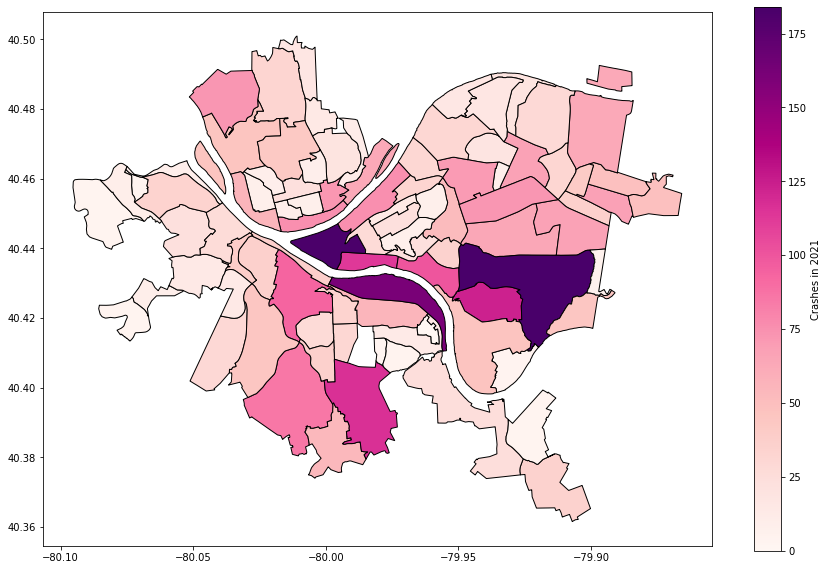

In [21]:
neighborhood_data["Crashes"] = filtered_neighborhoods["Crashes"]
neighborhood_data.plot(column="Crashes", 
                       legend=True,
                       edgecolor="black", 
                       cmap='RdPu',
                       legend_kwds={'label': 'Crashes in 2021'}, 
                       figsize=(15,10))

In the graph above, the lighter the color, the more crashes.

# Conclusion

Unfortunately we have not made our group metric yet even though it is the most important part of the project. Although it's looking like it is going to be Squirrell Hill North since it is in the top 10 of each metric, even topping the list on crash data.

We decided to weight each of our categories based on how we interpret their impact on "drivability". Since the number of speed humps is not nearly as important as traffic or accidents, we have decided to weight it as 10% of our final results. We have also weighted traffic count and accident count 40% and 50% respectively because we feel accident count is slightly more important. By doing this we will find which neighborhoods are higher in which important categories and also significantly lowering the chances of a tie.